<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/logistic_regression_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/realistic_logistic_placement_data_less_noise.csv')

In [ ]:
dataset.head()

,CGPA,Experience,Placed
0,7.748357,2.780328,1
1,7.430868,3.357113,1
2,7.823844,4.477894,1
3,8.261515,2.481730,1
4,7.382923,2.191506,1


In [ ]:
dataset.shape

(150, 3)

In [ ]:
X = dataset.iloc[:, [0,1]].values
Y = dataset.iloc[:, 2].values.reshape(-1, 1)

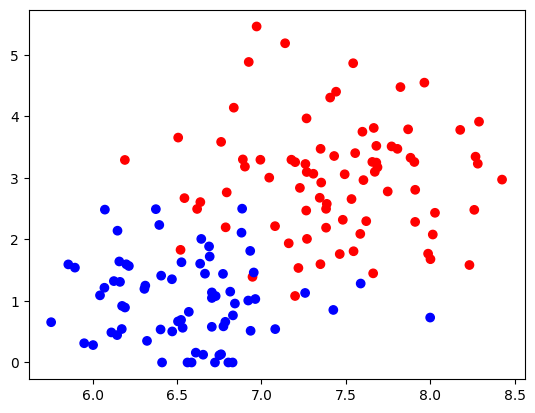

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr')

In [ ]:
def perceptron(x, y):
  lr = 0.01
  weights = np.ones(3)
  x = np.insert(x, 0, 1, axis = 1)

  for i in range(1000):
    j = np.random.randint(150)
    y_hat = sigmoid(np.dot(x[j], weights))
    weights = weights + (lr * (y[j] - y_hat) * x[j])

  return weights

def sigmoid(z):
  num = 1 / (1 + np.exp(-z))
  return num

In [ ]:
weights = perceptron(X, Y)

Text(0, 0.5, 'Experience (Years)')

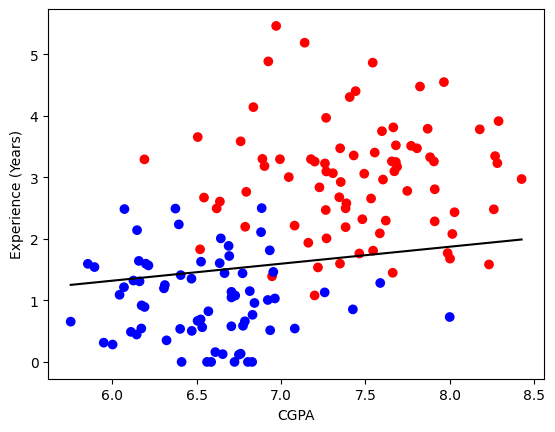

In [ ]:
plt.scatter(dataset['CGPA'], dataset['Experience'], c=Y, cmap='bwr')

# Plot decision line: w0 + w1*cgpa + w2*experience = 0
cgpa_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
experience_vals = -(weights[0] + weights[1]*cgpa_vals) / weights[2]

plt.plot(cgpa_vals, experience_vals, color='black')

plt.xlabel("CGPA")
plt.ylabel("Experience (Years)")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


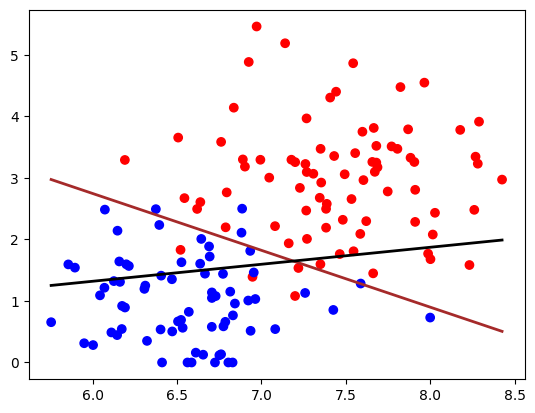

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.predict(x_test)

weights1 = lr.coef_[0]
bias1 = lr.intercept_
x_value = np.linspace(dataset['CGPA'].min(), dataset['CGPA'].max(), 150)
y_value = -((weights1[0] * x_value) + bias1)/weights1[1]
plt.scatter(dataset['CGPA'], dataset['Experience'], c=Y, cmap='bwr')
plt.plot(x_value, y_value, color='brown', linewidth=2)

plt.plot(cgpa_vals, experience_vals, color='black', linewidth=2)